In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.preprocessing import LabelEncoder #To Encoding
import missingno as msno #Visualisation Matrix NaNs

### **STEPS**

Dataframe about Coronavirus Group D

In [2]:
from utils.folders_tb import downloader
world = downloader(url='https://covid.ourworldindata.org/data/owid-covid-data.csv')
world

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62060,ZWE,Africa,Zimbabwe,2021-01-20,29408.0,733.0,736.000,879.0,54.0,41.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62061,ZWE,Africa,Zimbabwe,2021-01-21,30047.0,639.0,668.429,917.0,38.0,40.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62062,ZWE,Africa,Zimbabwe,2021-01-22,30523.0,476.0,630.571,962.0,45.0,42.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62063,ZWE,Africa,Zimbabwe,2021-01-23,31007.0,484.0,589.429,974.0,12.0,41.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


<AxesSubplot:>

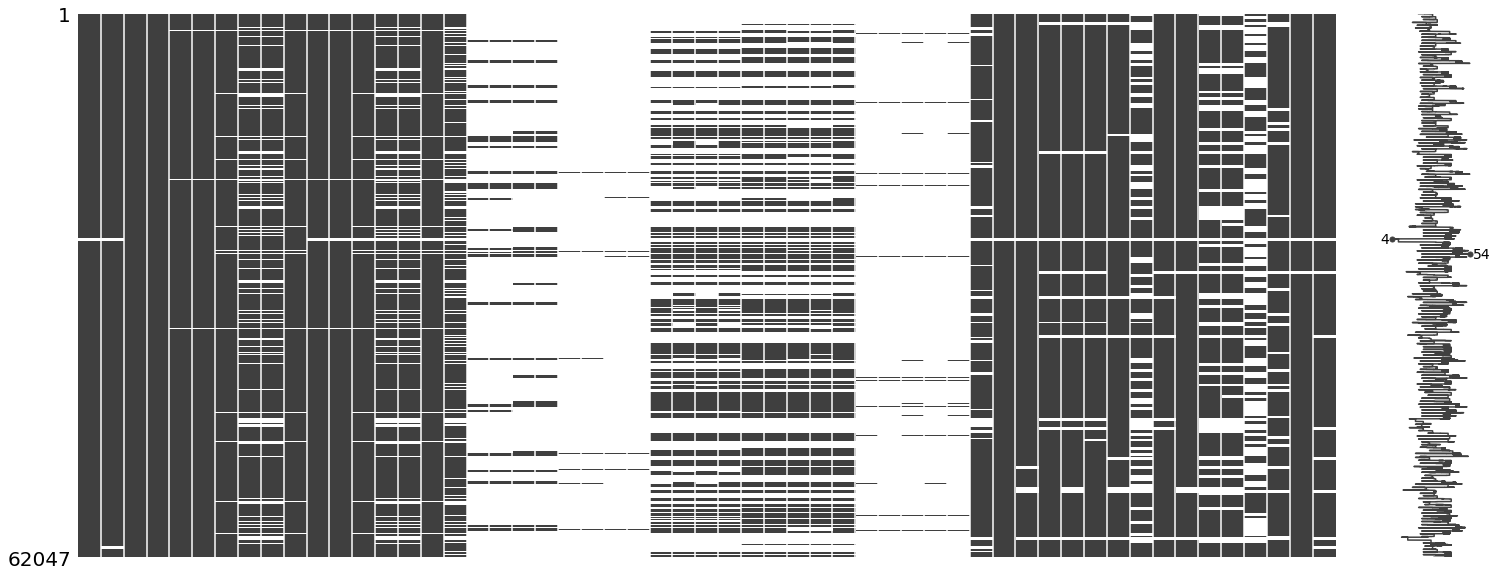

In [5]:
#This correlation Matrix of NaNs is showing how many columns have a lot of non-values
msno.matrix(world)

<AxesSubplot:>

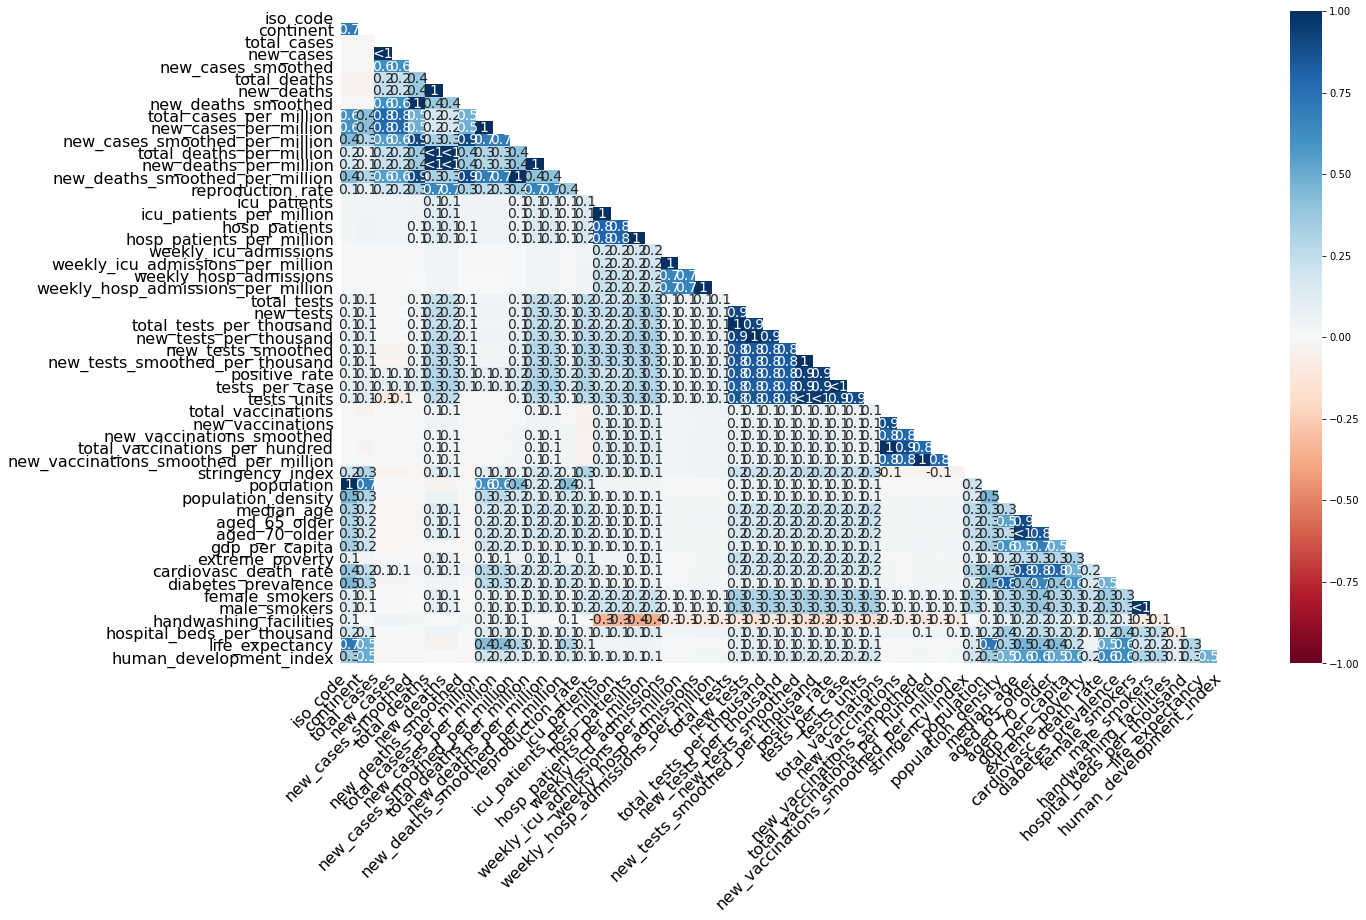

In [4]:
msno.heatmap(world)

In [6]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62047 entries, 0 to 62046
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               61694 non-null  object 
 1   continent                              61325 non-null  object 
 2   location                               62047 non-null  object 
 3   date                                   62047 non-null  object 
 4   total_cases                            61450 non-null  float64
 5   new_cases                              61443 non-null  float64
 6   new_cases_smoothed                     60484 non-null  float64
 7   total_deaths                           52913 non-null  float64
 8   new_deaths                             52912 non-null  float64
 9   new_deaths_smoothed                    60484 non-null  float64
 10  total_cases_per_million                61097 non-null  float64
 11  ne

In [8]:
#In this section only it is showing how "date" columns has been changed from object to datetime to can work in future functions.
world_date = downloader(url='https://covid.ourworldindata.org/data/owid-covid-data.csv')
world_date["date"] = pd.to_datetime(world_date["date"])
world_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62047 entries, 0 to 62046
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               61694 non-null  object        
 1   continent                              61325 non-null  object        
 2   location                               62047 non-null  object        
 3   date                                   62047 non-null  datetime64[ns]
 4   total_cases                            61450 non-null  float64       
 5   new_cases                              61443 non-null  float64       
 6   new_cases_smoothed                     60484 non-null  float64       
 7   total_deaths                           52913 non-null  float64       
 8   new_deaths                             52912 non-null  float64       
 9   new_deaths_smoothed                    60484 non-null  float6

In [4]:
from utils.mining_data_tb import countries
gbr = countries(df=world, code= "GBR")
prt = countries(df=world, code= "PRT")
ven = countries(df=world, code= "VEN")
tur = countries(df=world, code= "TUR")
esp = countries(df=world, code= "ESP")
gbr

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
58315,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
58316,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
58317,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
58318,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
58319,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58670,GBR,Europe,United Kingdom,2021-01-20,3515796.0,38992.0,42120.429,93469.0,1826.0,1222.714,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
58671,GBR,Europe,United Kingdom,2021-01-21,3553773.0,37977.0,40573.714,94765.0,1296.0,1228.857,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
58672,GBR,Europe,United Kingdom,2021-01-22,3594094.0,40321.0,38350.286,96166.0,1401.0,1245.429,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
58673,GBR,Europe,United Kingdom,2021-01-23,3627746.0,33652.0,37239.429,97518.0,1352.0,1253.000,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [5]:
from utils.mining_data_tb import column_erraser

gbr_dd = column_erraser(df=gbr, col1="date", col2='new_cases', col3="new_deaths")
prt_dd = column_erraser(df=prt, col1="date", col2='new_cases', col3="new_deaths")
ven_dd = column_erraser(df=ven, col1="date", col2='new_cases', col3="new_deaths")
tur_dd = column_erraser(df=tur, col1="date", col2='new_cases', col3="new_deaths")
esp_dd = column_erraser(df=esp, col1="date", col2='new_cases', col3="new_deaths")


In [5]:
gbr_dd

,date,new_cases,new_deaths
58315,2020-01-31,2.0,NaN
58316,2020-02-01,0.0,NaN
58317,2020-02-02,0.0,NaN
58318,2020-02-03,6.0,NaN
58319,2020-02-04,0.0,NaN
...,...,...,...
58670,2021-01-20,38992.0,1826.0
58671,2021-01-21,37977.0,1296.0
58672,2021-01-22,40321.0,1401.0
58673,2021-01-23,33652.0,1352.0


In [6]:
gbr_dd.dropna(inplace= True)
prt_dd.dropna( inplace= True)
ven_dd.dropna( inplace= True)
tur_dd.dropna( inplace= True)
esp_dd.dropna( inplace= True)

In [7]:
gbr_dd

,date,new_cases,new_deaths
58350,2020-03-06,79.0,1.0
58351,2020-03-07,55.0,1.0
58352,2020-03-08,54.0,0.0
58353,2020-03-09,147.0,1.0
58354,2020-03-10,259.0,4.0
...,...,...,...
58670,2021-01-20,38992.0,1826.0
58671,2021-01-21,37977.0,1296.0
58672,2021-01-22,40321.0,1401.0
58673,2021-01-23,33652.0,1352.0


In [18]:
#Pregunta C8
gbr.corr()
prt.corr()
ven.corr()
tur.corr()
esp.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000e+00,5.306517e-01,8.070279e-01,8.793744e-01,5.678626e-02,1.435459e-01,1.000000e+00,5.306517e-01,8.070280e-01,8.793744e-01,...,3.290689e-15,NaN,4.271298e-16,-3.145630e-15,3.290689e-15,3.604038e-15,NaN,2.769411e-15,3.700407e-15,-4.853011e-15
new_cases,5.306517e-01,1.000000e+00,6.480925e-01,3.881492e-01,3.449407e-01,1.676450e-01,5.306517e-01,1.000000e+00,6.480924e-01,3.881493e-01,...,2.735455e-18,NaN,1.818611e-15,-1.593129e-15,2.735455e-18,-1.850639e-15,NaN,1.616520e-15,7.547041e-16,1.243446e-15
new_cases_smoothed,8.070279e-01,6.480925e-01,1.000000e+00,6.128911e-01,2.063171e-01,2.996779e-01,8.070279e-01,6.480924e-01,1.000000e+00,6.128911e-01,...,-1.772436e-16,NaN,4.070039e-16,-4.741268e-16,6.255658e-17,-1.909256e-15,NaN,-7.877495e-18,-5.812549e-16,-8.271370e-16
total_deaths,8.793744e-01,3.881492e-01,6.128911e-01,1.000000e+00,-1.186537e-01,-1.084045e-01,8.793744e-01,3.881493e-01,6.128912e-01,1.000000e+00,...,-2.557054e-15,NaN,2.007449e-15,1.404248e-15,1.516406e-15,-3.425526e-15,NaN,-8.803784e-16,2.667679e-15,-3.378236e-15
new_deaths,5.678626e-02,3.449407e-01,2.063171e-01,-1.186537e-01,1.000000e+00,7.224396e-01,5.678626e-02,3.449407e-01,2.063171e-01,-1.186538e-01,...,4.343872e-16,NaN,6.529491e-16,6.806264e-16,-3.594241e-16,3.386764e-16,NaN,-3.148134e-16,4.374249e-16,-2.226180e-16
new_deaths_smoothed,1.435459e-01,1.676450e-01,2.996779e-01,-1.084045e-01,7.224396e-01,1.000000e+00,1.435459e-01,1.676451e-01,2.996780e-01,-1.084047e-01,...,-4.128425e-16,NaN,-4.540155e-16,1.749295e-16,-7.425536e-16,-5.125830e-16,NaN,-1.483711e-17,5.325649e-16,5.304266e-16
total_cases_per_million,1.000000e+00,5.306517e-01,8.070279e-01,8.793744e-01,5.678626e-02,1.435459e-01,1.000000e+00,5.306517e-01,8.070280e-01,8.793744e-01,...,8.872882e-16,NaN,9.508140e-16,-1.099521e-15,8.872882e-16,9.734605e-16,NaN,-1.027271e-15,-4.789078e-16,-2.573079e-16
new_cases_per_million,5.306517e-01,1.000000e+00,6.480924e-01,3.881493e-01,3.449407e-01,1.676451e-01,5.306517e-01,1.000000e+00,6.480923e-01,3.881493e-01,...,-8.952691e-17,NaN,3.375318e-16,3.127593e-16,-8.952691e-17,-1.218316e-16,NaN,2.101396e-16,4.299119e-16,2.831688e-16
new_cases_smoothed_per_million,8.070280e-01,6.480924e-01,1.000000e+00,6.128912e-01,2.063171e-01,2.996780e-01,8.070280e-01,6.480923e-01,1.000000e+00,6.128912e-01,...,4.343116e-16,NaN,2.733555e-16,-2.816281e-16,4.163806e-16,2.862282e-16,NaN,-1.467488e-16,-3.237105e-16,-2.877427e-17
total_deaths_per_million,8.793744e-01,3.881493e-01,6.128911e-01,1.000000e+00,-1.186538e-01,-1.084047e-01,8.793744e-01,3.881493e-01,6.128912e-01,1.000000e+00,...,-7.501967e-16,NaN,-8.646679e-16,9.904154e-16,-5.530547e-16,-1.055464e-15,NaN,3.613229e-17,6.134059e-16,-1.060709e-15


In [8]:
#Pregunta A2
worlda_2 = world.drop(['iso_code','continent','location','date', 'aged_65_older', 'tests_units'],1)
from utils.mining_data_tb import get_top_abs_correlations
get_top_abs_correlations(df=worlda_2, n=7)

new_cases           new_cases_smoothed     0.990950
total_cases         total_deaths           0.977766
new_cases_smoothed  total_deaths           0.976873
icu_patients        hosp_patients          0.975158
new_tests           new_tests_smoothed     0.975068
new_deaths          new_deaths_smoothed    0.973488
total_cases         new_cases_smoothed     0.970599
dtype: float64

In [9]:
worlda_2cor = column_erraser(df= worlda_2, col1='new_cases', col2='new_cases_smoothed', col3='total_deaths', col4='total_cases', col5='new_tests', col6='new_tests_smoothed', col7= "icu_patients", col8='hosp_patients', col9='new_deaths', col10='new_deaths_smoothed')
worlda_2cor.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,new_tests_smoothed
total_cases,1.000000,0.958567,0.970599,0.977766,0.883569,0.906525,0.882391,0.884858,0.883138,0.902680
new_cases,0.958567,1.000000,0.990950,0.967305,0.933366,0.934160,0.890198,0.897988,0.857692,0.853262
new_cases_smoothed,0.970599,0.990950,1.000000,0.976873,0.922549,0.944571,0.909069,0.915676,0.857943,0.870133
total_deaths,0.977766,0.967305,0.976873,1.000000,0.919862,0.944834,0.881514,0.900303,0.846004,0.847494
new_deaths,0.883569,0.933366,0.922549,0.919862,1.000000,0.973488,0.915093,0.913121,0.701788,0.664222
new_deaths_smoothed,0.906525,0.934160,0.944571,0.944834,0.973488,1.000000,0.962369,0.956632,0.718675,0.713038
icu_patients,0.882391,0.890198,0.909069,0.881514,0.915093,0.962369,1.000000,0.975158,0.847809,0.873540
hosp_patients,0.884858,0.897988,0.915676,0.900303,0.913121,0.956632,0.975158,1.000000,0.847817,0.880892
new_tests,0.883138,0.857692,0.857943,0.846004,0.701788,0.718675,0.847809,0.847817,1.000000,0.975068
new_tests_smoothed,0.902680,0.853262,0.870133,0.847494,0.664222,0.713038,0.873540,0.880892,0.975068,1.000000


In [7]:
#Pregunta A.4.b - Ejecutado debajo de este código en la sección Visualization Javi. 
from utils.mining_data_tb import A_4_b
gbr1M = A_4_b(df= gbr_dd, column='date', key= "date", freq= '1M')

In [8]:
gbr10D = A_4_b(df= gbr_dd, column='date', key= "date", freq= '10D') 

In [25]:
prt1M = A_4_b(df= prt_dd, column='date', key= "date", freq= '1M') 

In [26]:
prt10D = A_4_b(df= prt_dd, column='date', key= "date", freq= '10D') 

In [27]:
ven1M = A_4_b(df= ven_dd, column='date', key= "date", freq= '1M') 

In [28]:
ven10D = A_4_b(df= ven_dd, column='date', key= "date", freq= '10D') 

In [29]:
tur1M = A_4_b(df= tur_dd, column='date', key= "date", freq= '1M') 

In [30]:
tur10D = A_4_b(df= tur_dd, column='date', key= "date", freq= '10D') 

In [31]:
esp1M = A_4_b(df= esp_dd, column='date', key= "date", freq= '1M') 

In [32]:
esp10D = A_4_b(df= esp_dd, column='date', key= "date", freq= '10D') 

# *Visualization Javi*


In [19]:
from utils.visualization_tb import b_2_line
gbrb_2_line = b_2_line(df= gbr_dd, x= gbr_dd['date'], y=gbr_dd.columns, title= 'GBR covid deaths')

In [20]:
from utils.visualization_tb import b_2_bar
gbrb_2_bar = b_2_bar(df= gbr_dd, x= gbr_dd['date'], y=gbr_dd.columns, title= 'GBR covid deaths')

In [21]:
from utils.visualization_tb import b_2_dots
gbrb_2_dots = b_2_dots(df= gbr_dd, x= gbr_dd['date'], y=gbr_dd.columns, title= 'GBR covid deaths')

In [33]:
prtb_2_line = b_2_line(df= prt_dd, x= prt_dd['date'], y=prt_dd.columns, title= 'PRT covid deaths')

In [37]:
prtb_2_bar = b_2_bar(df= prt_dd, x= prt_dd['date'], y=prt_dd.columns, title= 'PRT covid deaths')

In [38]:
prtb_2_dots = b_2_dots(df= prt_dd, x= prt_dd['date'], y=prt_dd.columns, title= 'PRT covid deaths')

In [39]:
venb_2_line = b_2_line(df= ven_dd, x= ven_dd['date'], y=ven_dd.columns, title= 'VEN covid deaths')

In [40]:
venb_2_bar = b_2_bar(df= ven_dd, x= ven_dd['date'], y=ven_dd.columns, title= 'VEN covid deaths')

In [42]:
venb_2_dots = b_2_dots(df= ven_dd, x= ven_dd['date'], y=ven_dd.columns, title= 'VEN covid deaths')

In [43]:
turb_2_line = b_2_line(df= tur_dd, x= tur_dd['date'], y=tur_dd.columns, title= 'TUR covid deaths')

In [44]:
turb_2_bar = b_2_bar(df= tur_dd, x= tur_dd['date'], y=tur_dd.columns, title= 'TUR covid deaths')

In [45]:
turb_2_dots = b_2_dots(df= tur_dd, x= tur_dd['date'], y=tur_dd.columns, title= 'TUR covid deaths')

In [46]:
espb_2_line = b_2_line(df= esp_dd, x= esp_dd['date'], y=esp_dd.columns, title= 'ESP covid deaths')

In [47]:
espb_2_bar = b_2_bar(df= esp_dd, x= esp_dd['date'], y=esp_dd.columns, title= 'ESP covid deaths')

In [48]:
espb_2_dots = b_2_dots(df= esp_dd, x= esp_dd['date'], y=esp_dd.columns, title= 'ESP covid deaths')

<AxesSubplot:>

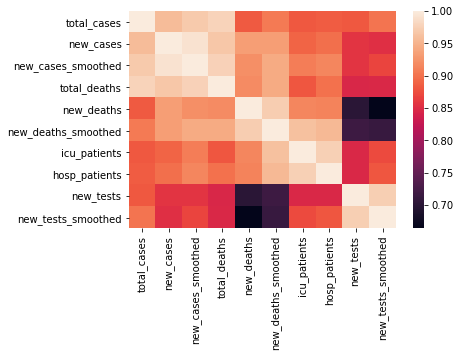

In [13]:
sns.heatmap(worlda_2cor.corr())

In [32]:
gbrb1M_line = b_2_line(df= gbr1M, x= gbr1M.index, y=gbr1M.columns, title= 'GBR 1M covid deaths')

In [22]:
gbr10D_line = b_2_line(df= gbr10D, x= gbr10D.index, y=gbr10D.columns, title= 'GBR 10D covid deaths')

In [33]:
prt1M_line = b_2_line(df= prt1M, x= prt1M.index, y=prt1M.columns, title= 'PRT 1M covid deaths')

In [34]:
prt10D_line = b_2_line(df= prt10D, x= prt10D.index, y=prt10D.columns, title= 'PRT 10D covid deaths')

In [35]:
ven1M_line = b_2_line(df= ven1M, x= ven1M.index, y=ven1M.columns, title= 'VEN 1M covid deaths')

In [36]:
ven10D_line = b_2_line(df= ven10D, x= ven10D.index, y=ven10D.columns, title= 'VEN 10D covid deaths')

In [37]:
tur1M_line = b_2_line(df= tur1M, x= tur1M.index, y=tur1M.columns, title= 'TUR 1M covid deaths')

In [38]:
tur10D_line = b_2_line(df= tur10D, x= tur10D.index, y=tur10D.columns, title= 'TUR 10D covid deaths')

In [39]:
esp1M_line = b_2_line(df= esp1M, x= esp1M.index, y=esp1M.columns, title= 'ESP 1M covid deaths')

In [40]:
esp10D_line = b_2_line(df= esp10D, x= esp10D.index, y=esp10D.columns, title= 'ESP 10D covid deaths')

# *Visualization Ariadna*


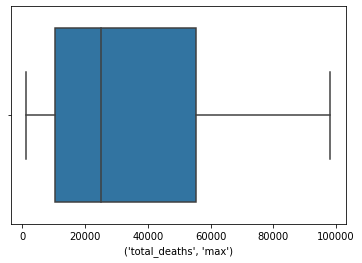

<Figure size 432x288 with 0 Axes>

In [3]:
#Is the second way: this plot is showing that the 75% of the global Countries about total deaths are between 250K and more 500K.

from utils.visualization_tb import C10c

C10c(df=world)

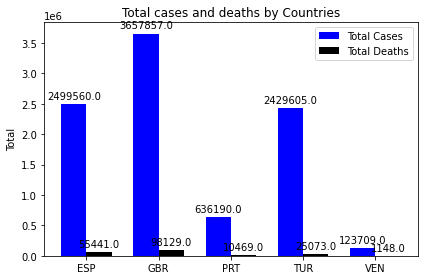

<Figure size 432x288 with 0 Axes>

In [3]:
#In this graphic is representing total cases and total deaths, so this data it's the total since the covid-19 begun. United Kingdom and Spain are in top 10 Ranking of the worst countries that didn't manage very well. 
 
from utils.visualization_tb import C10a

C10a(df=world)

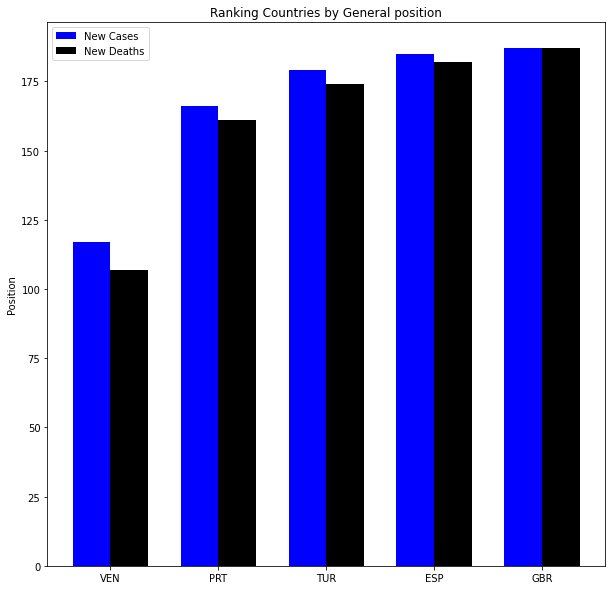

<Figure size 432x288 with 0 Axes>

In [3]:
"""In this graphic has been thought with new cases and new deaths because they are not accumulative"""
#It is showing the position of our countries: Portugal, Venezuela, Turkey, UK and Spain in general ranking in over the world. Venezuela is the first country with less new cases and new deaths being 116 position in new cases and 106 in new deaths respect 190 countries total. Instead of the last country is United Kingdom in 186 position in new cases and deaths. Spain is the second last country being 182/190 and 180/190 in new cases and deaths respectively. 
 
from utils.visualization_tb import position

position(df=world, col1="iso_code", col2="date", col3="new_cases", col4="new_deaths", col5="continent", col6="location", col7="tests_units")

# *Visualization Group C's Data - Total Cases*
##### Visualization Ariadna

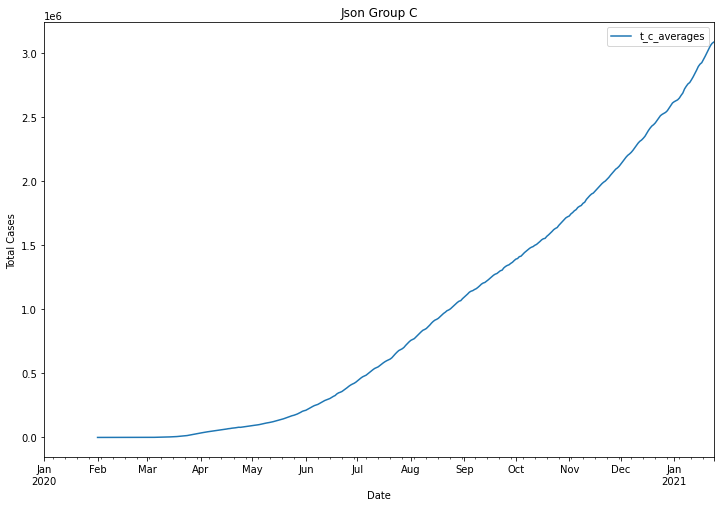

<Figure size 432x288 with 0 Axes>

In [4]:
#This graphic from Group C is representing how the cases has gone increased during all Coronavirus pandemic. 
from utils.visualization_tb import groupC_plot

groupC_plot(df=world)